In [1]:
from typing import TypedDict, Literal

In [2]:
class PortfolioState(TypedDict):
    amount_usd:float
    total_usd:float
    total:float
    target_currency: Literal["INR", "EUR",]

In [3]:
def cal_total(state: PortfolioState)->PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

In [4]:
def convert_inr(state: PortfolioState)->PortfolioState:
    state['total'] = state['total_usd'] * 85
    return state

In [20]:
def convert_eur(state: PortfolioState)->PortfolioState:
    state['total'] = state['total_usd'] * 0.9
    return state

In [21]:
def choose_conversion(state: PortfolioState)->str:
    return state['target_currency']

In [22]:
from langgraph.graph import StateGraph,START,END
builder=StateGraph(PortfolioState)
builder.add_node("Calc_total_node",cal_total)
builder.add_node("Convert_inr_node",convert_inr)
builder.add_node("Convert_eur_node",convert_eur)

builder.add_edge(START,"Calc_total_node")
builder.add_conditional_edges(
    "Calc_total_node",choose_conversion,
    {
    "INR":"Convert_inr_node",
    "EUR":"Convert_eur_node"
})
builder.add_edge(['Convert_inr_node','Convert_eur_node'],END)
graph=builder.compile()

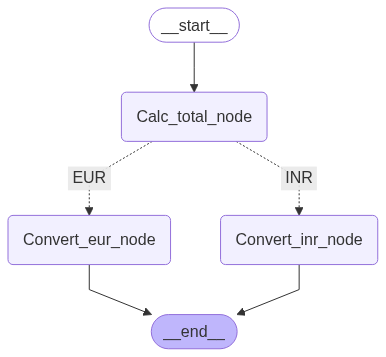

In [23]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
graph.invoke({"amount_usd":100,"target_currency":"EUR"})

{'amount_usd': 100,
 'total_usd': 108.0,
 'total': 97.2,
 'target_currency': 'EUR'}